In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.shape

(284807, 31)

In [5]:
X = data.loc[:,"Time":"Amount"]
Y = data["Class"]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)

In [6]:
print(X_train.head())

            Time        V1        V2        V3        V4        V5        V6  \
104363   69033.0  1.173539  0.105783  0.491945  0.460927 -0.290228 -0.211526   
70784    54017.0  0.972750 -0.320104  1.392633  1.886296 -1.082805  0.279987   
157181  109663.0  2.120341  0.033376 -1.457889  0.174712  0.725510 -0.040703   
32869    36997.0  1.443265 -1.231389  0.895742 -1.275774 -1.976490 -0.567732   
20924    31356.0  1.274751  0.180859 -0.348426  0.758106  0.513784  0.289029   

              V7        V8        V9  ...       V20       V21       V22  \
104363 -0.160580  0.115307 -0.124631  ... -0.153120 -0.185235 -0.568640   
70784  -0.532052  0.288073  1.340289  ... -0.209139 -0.368695 -0.709064   
157181  0.012087 -0.225067  1.542349  ... -0.163251 -0.469336 -0.960548   
32869  -1.460900  0.086336 -1.334486  ... -0.495602 -0.037108  0.263237   
20924   0.072602  0.037646  0.195892  ... -0.156481 -0.038570 -0.089641   

             V23       V24       V25       V26       V27       V28  

In [7]:
n_frauds = Y.value_counts()[1]
n_not_frauds = Y.value_counts()[0]
print(f"Number of fraudulent transactions: {n_frauds}")
print(f"Number of normal transactions: {n_not_frauds}")
print(f"Percentage of fraudulent transactions: {n_frauds/(n_frauds+n_not_frauds) * 100} %")

Number of fraudulent transactions: 492
Number of normal transactions: 284315
Percentage of fraudulent transactions: 0.1727485630620034 %


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

col_trans = ColumnTransformer([("Scaler", StandardScaler(), ["Time", "Amount"])], remainder="passthrough")
col_trans.fit(X_train)
X_train_scaled = pd.DataFrame(col_trans.transform(X_train), columns=X_train.columns)

In [9]:
print(X_train_scaled.head())

       Time        V1        V2        V3        V4        V5        V6  \
0 -0.544071 -0.342668  1.173539  0.105783  0.491945  0.460927 -0.290228   
1 -0.860264 -0.166965  0.972750 -0.320104  1.392633  1.886296 -1.082805   
2  0.311475 -0.345411  2.120341  0.033376 -1.457889  0.174712  0.725510   
3 -1.218654 -0.326692  1.443265 -1.231389  0.895742 -1.275774 -1.976490   
4 -1.337437 -0.282975  1.274751  0.180859 -0.348426  0.758106  0.513784   

         V7        V8        V9  ...       V20       V21       V22       V23  \
0 -0.211526 -0.160580  0.115307  ... -0.182959 -0.153120 -0.185235 -0.568640   
1  0.279987 -0.532052  0.288073  ... -0.032095 -0.209139 -0.368695 -0.709064   
2 -0.040703  0.012087 -0.225067  ...  0.742895 -0.163251 -0.469336 -0.960548   
3 -0.567732 -1.460900  0.086336  ... -0.907980 -0.495602 -0.037108  0.263237   
4  0.289029  0.072602  0.037646  ... -0.200092 -0.156481 -0.038570 -0.089641   

        V24       V25       V26       V27       V28    Amount  
0  0

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principal_components = pca.fit_transform(X_train_scaled)

In [11]:
principal_com_df = pd.DataFrame(data= principal_components, columns = ['PC1', 'PC2'])

In [12]:
principal_com_df_with_gt = pd.concat([principal_com_df, Y_train], axis=1)

In [13]:
principal_com_df_with_gt.head()

,PC1,PC2,Class
0,-1.145092,-0.093827,0.0
1,-0.774497,0.237755,NaN
2,-2.155808,0.569675,0.0
3,-1.144485,0.905217,NaN
4,-1.204867,-0.003492,0.0


In [14]:
import matplotlib.pyplot as plt

In [15]:
print(principal_com_df_with_gt.shape)

(273526, 3)


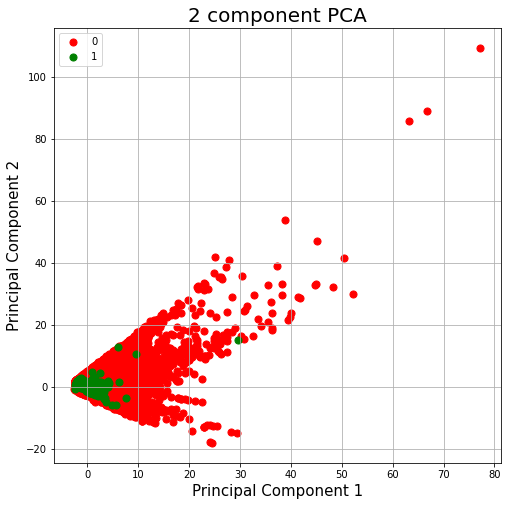

In [16]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = principal_com_df_with_gt['Class'] == target
    ax.scatter(principal_com_df_with_gt.loc[indicesToKeep, 'PC1']
               , principal_com_df_with_gt.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

<AxesSubplot:>

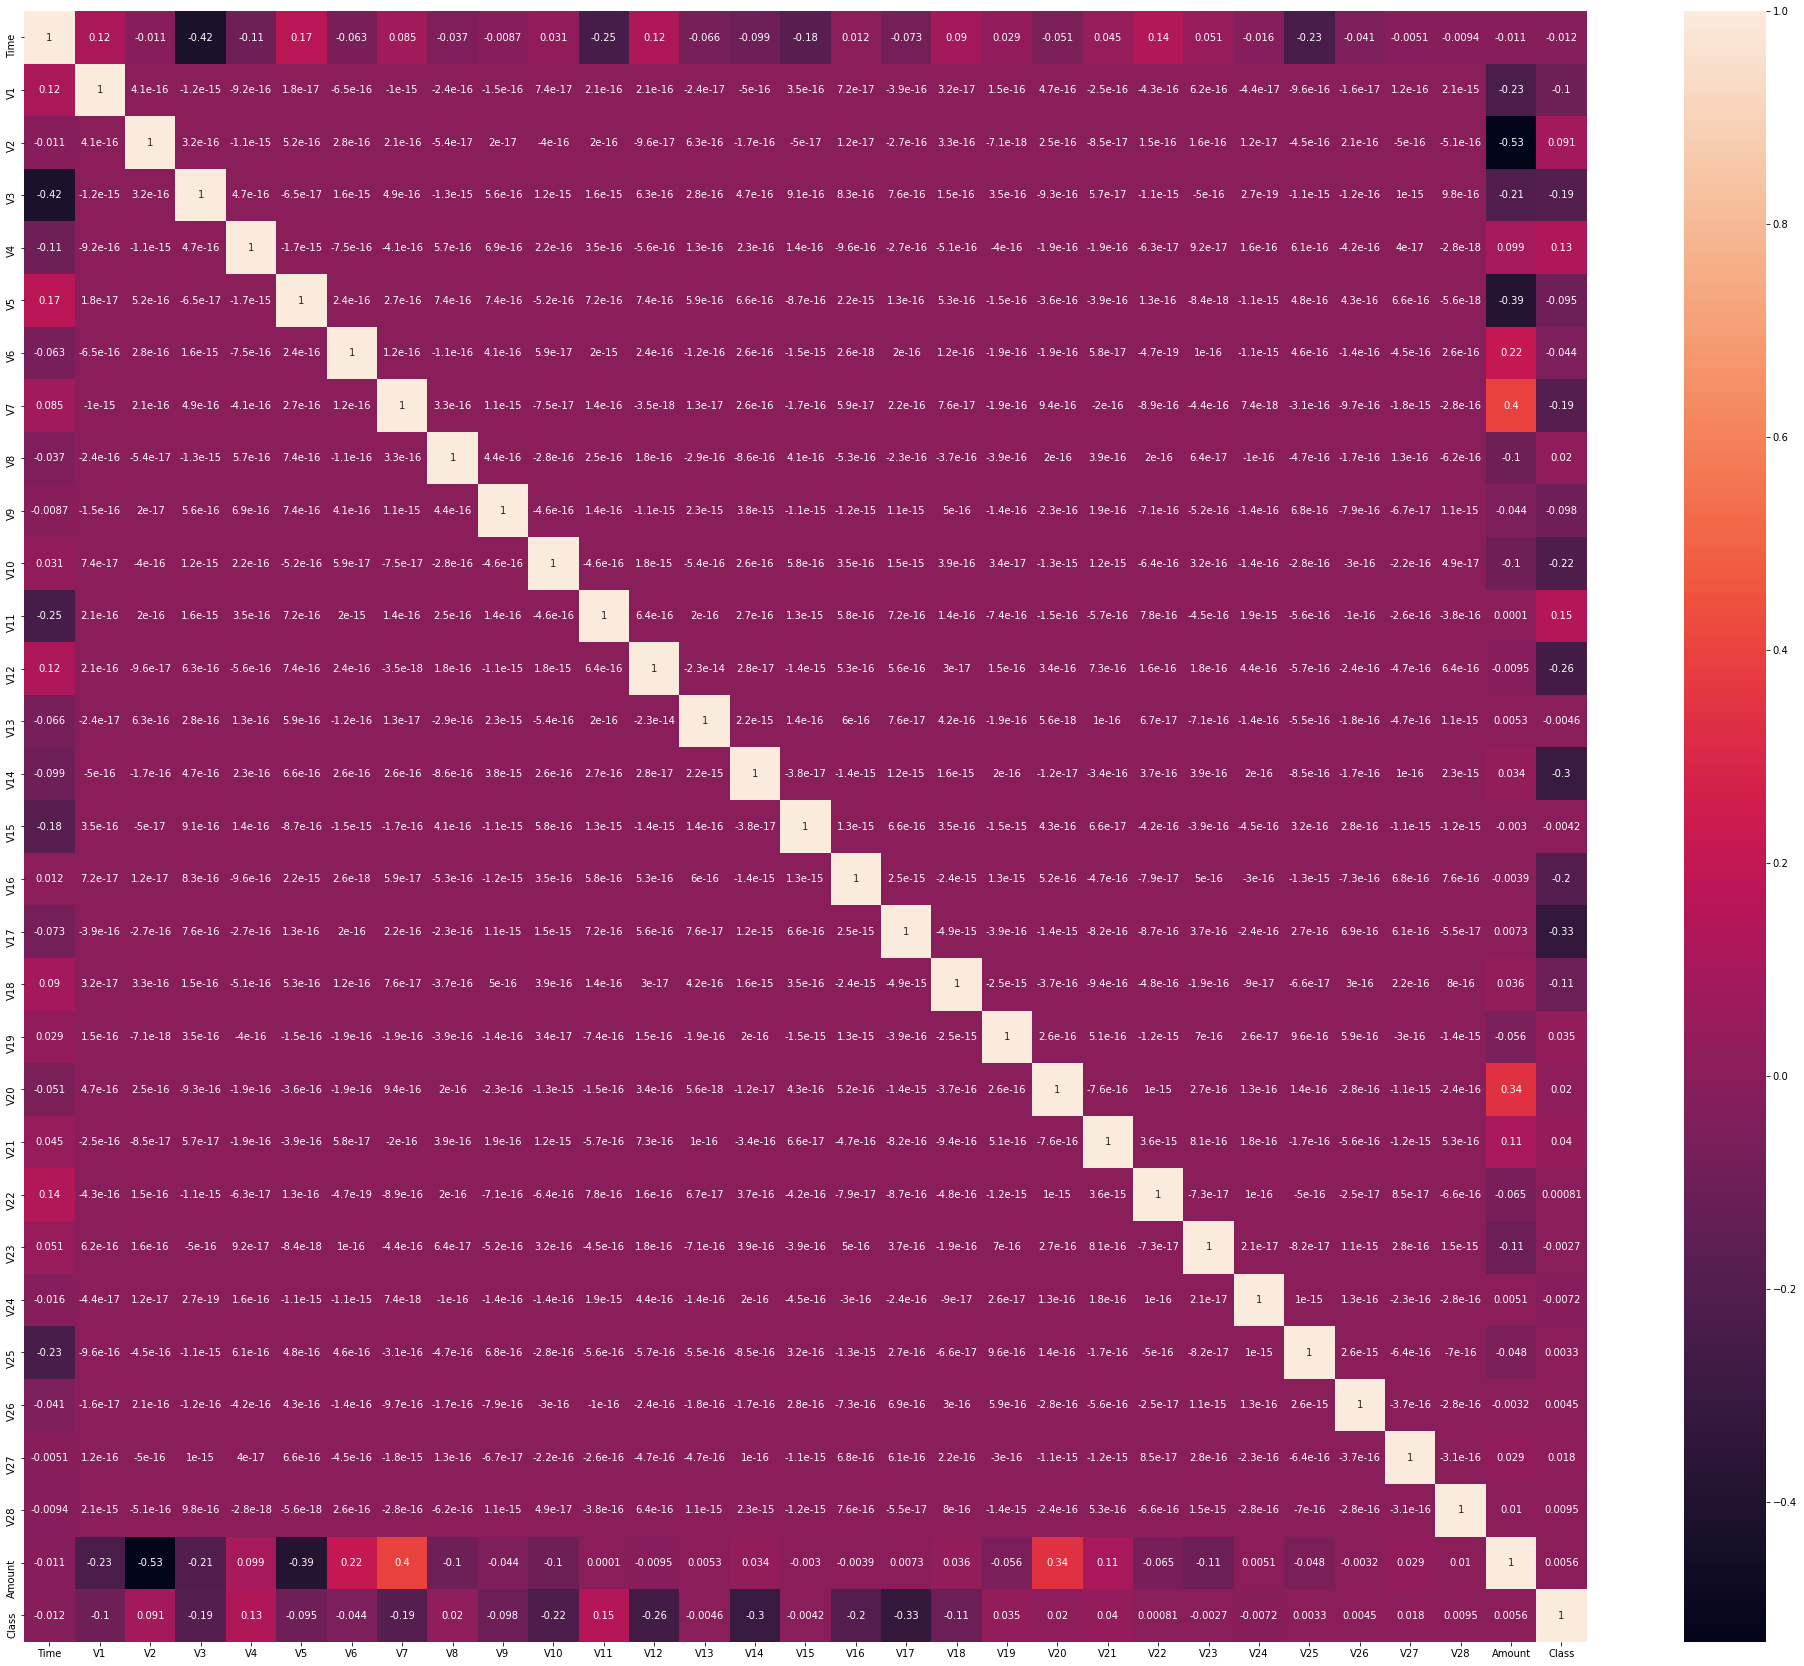

In [17]:
#Visualize correlation matrix
import seaborn as sn
fig, ax = plt.subplots(figsize=(35,30))         # Sample figsize in inches
correlation_matrix = pd.concat([X, Y], axis=1).corr()
sn.heatmap(correlation_matrix, annot=True)



# Let's explore how a simple Logistic Regression Model performs

In [18]:
n_frauds_train = Y_train.value_counts()[1]
n_not_frauds_train = Y_train.value_counts()[0]
n_frauds_test = Y_test.value_counts()[1]
n_not_frauds_test = Y_test.value_counts()[0]

print(f"Percentage of fraudulent transactions in training set: {n_frauds_train/(n_frauds_train+n_not_frauds_train) * 100} %")
print(f"Percentage of fraudulent transactions in test set: {n_frauds_test/(n_frauds_test+n_not_frauds_test) * 100} %")

Percentage of fraudulent transactions in training set: 0.17292457591783889 %
Percentage of fraudulent transactions in test set: 0.17204452090867595 %


In [19]:
print(n_frauds_train)
print(n_frauds_test)

394
98


In [20]:
from sklearn.linear_model import LogisticRegression

logistic_r = LogisticRegression()

logistic_r.fit(X_train_scaled, Y_train)

LogisticRegression()

In [21]:
print(f"Overall train accuracy is: {logistic_r.score(X_train_scaled, Y_train)*100}%")
X_test_scaled = col_trans.transform(X_test)
print(f"Overall test accuracy is: {logistic_r.score(X_test_scaled, Y_test)*100}%")


Overall train accuracy is: 99.91485439662928%
Overall test accuracy is: 99.92626663389628%


Confusion matrix, without normalization
[[56858     6]
 [   36    62]]
Normalized confusion matrix
[[1.00e+00 1.06e-04]
 [3.67e-01 6.33e-01]]


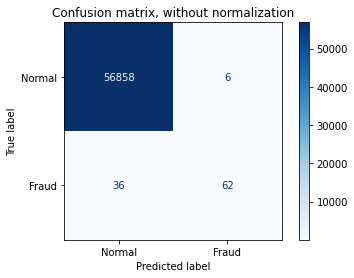

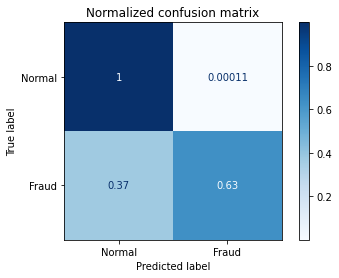

In [22]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(logistic_r, X_test_scaled, Y_test,
                                 display_labels=["Normal", "Fraud"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [23]:
from sklearn.metrics import f1_score
predicted_test = logistic_r.predict(X_test_scaled)
test_f1_score = f1_score(Y_test, predicted_test)
print(f"Test F1 score is {test_f1_score}")

from sklearn.metrics import average_precision_score
Y_score = logistic_r.decision_function(X_test_scaled)
average_precision = average_precision_score(Y_test, Y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))


Test F1 score is 0.746987951807229
Average precision-recall score: 0.83


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.83')

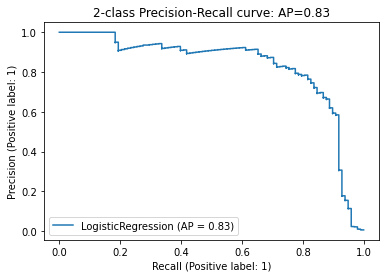

In [24]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(logistic_r, X_test_scaled, Y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [25]:
type(X)

pandas.core.frame.DataFrame

# Try same algorithm after we removed irrelevant features according to correlation matrix

In [26]:
irrelevant_features = ["Time", "V13", "V15", "V22", "V23", "V24", "V25", "V26", "V28"]

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns).drop(columns=irrelevant_features)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train.columns).drop(columns=irrelevant_features)

print(X_train_scaled.shape)

(227845, 21)


Overall train accuracy is: 99.91397660690382%
Overall test accuracy is: 99.92451107756047%
Confusion matrix, without normalization
[[56857     7]
 [   36    62]]
Normalized confusion matrix
[[1.00e+00 1.23e-04]
 [3.67e-01 6.33e-01]]


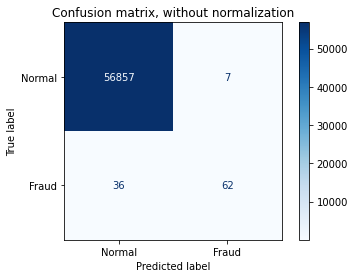

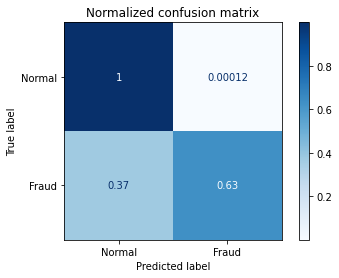

Test F1 score is 0.7425149700598802
Average precision-recall score: 0.82


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.82')

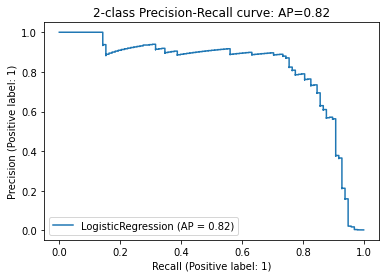

In [27]:
logistic_r = LogisticRegression()

logistic_r.fit(X_train_scaled, Y_train)

print(f"Overall train accuracy is: {logistic_r.score(X_train_scaled, Y_train)*100}%")
print(f"Overall test accuracy is: {logistic_r.score(X_test_scaled, Y_test)*100}%")

# Plot non-normalized confusion matrix

for title, normalize in titles_options:
    disp = plot_confusion_matrix(logistic_r, X_test_scaled, Y_test,
                                 display_labels=["Normal", "Fraud"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

predicted_test = logistic_r.predict(X_test_scaled)
test_f1_score = f1_score(Y_test, predicted_test)
print(f"Test F1 score is {test_f1_score}")

Y_score = logistic_r.decision_function(X_test_scaled)
average_precision = average_precision_score(Y_test, Y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

disp = plot_precision_recall_curve(logistic_r, X_test_scaled, Y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))



# Now let's try Support Vector Machines

In [28]:
# We'll use cross validation to evaluate the performance of our model

from sklearn.model_selection import StratifiedShuffleSplit
n_splits = 5
sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.2)

In [29]:
X_train_scaled = pd.DataFrame(col_trans.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(col_trans.transform(X_test), columns=X_train.columns)

print(X_train.shape)
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(227845, 30)
(227845, 30)
(56962, 30)


In [30]:
for train_index, test_index in sss.split(X_train_scaled.values, Y_train.values):
    X_train_cv, X_val_cv = X_train_scaled.values[train_index], X_train_scaled.values[test_index]
    Y_train_cv, Y_val_cv = Y_train.values[train_index], Y_train.values[test_index]
    print("X_train_cv shape: ", X_train_cv.shape)
    print("X_val_cv shape: ", X_val_cv.shape)
    print("Fraud examples Y_train_cv:",  np.count_nonzero(Y_train_cv == 1))
    print("Fraud examples Y_val_cv:",  np.count_nonzero(Y_val_cv == 1))

X_train_cv shape:  (182276, 30)
X_val_cv shape:  (45569, 30)
Fraud examples Y_train_cv: 315
Fraud examples Y_val_cv: 79
X_train_cv shape:  (182276, 30)
X_val_cv shape:  (45569, 30)
Fraud examples Y_train_cv: 315
Fraud examples Y_val_cv: 79
X_train_cv shape:  (182276, 30)
X_val_cv shape:  (45569, 30)
Fraud examples Y_train_cv: 315
Fraud examples Y_val_cv: 79
X_train_cv shape:  (182276, 30)
X_val_cv shape:  (45569, 30)
Fraud examples Y_train_cv: 315
Fraud examples Y_val_cv: 79
X_train_cv shape:  (182276, 30)
X_val_cv shape:  (45569, 30)
Fraud examples Y_train_cv: 315
Fraud examples Y_val_cv: 79


In [31]:
from sklearn.svm import SVC

In [ ]:
sum_acc = 0
sum_f1 = 0
idx = 1
for train_index, test_index in sss.split(X_train_scaled.values, Y_train.values):
    X_train_cv, X_val_cv = X_train_scaled.values[train_index], X_train_scaled.values[test_index]
    Y_train_cv, Y_val_cv = Y_train.values[train_index], Y_train.values[test_index]
    svc = SVC(class_weight="balanced", random_state=10)
    svc.fit(X_train_cv, Y_train_cv)
    train_acc = svc.score(X_train_cv, Y_train_cv)*100
    val_acc = svc.score(X_val_cv, Y_val_cv)*100
    print(f"Train accuracy batch {idx}: {train_acc}%")
    print(f"Val accuracy batch {idx}: {val_acc}%")
    predicted_probs = svc.predict(X_val_cv)
    pred_f1_score = f1_score(Y_val_cv, predicted_probs)
    print(f"Val F1 score: {pred_f1_score}")
    sum_acc += val_acc
    sum_f1 += pred_f1_score
    idx +=1
    
    titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(svc, X_val_cv, Y_val_cv,
                                     display_labels=["Normal", "Fraud"],
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
        disp.ax_.set_title(title)
        
print(f"Average test accuracy is {sum_acc/ n_splits}")
print(f"Average test f1 score is {sum_f1/ n_splits}")
        

    

    


In [32]:
#Now train model on full dataset and save it
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer

X = data.loc[:,"Time":"Amount"]
Y = data["Class"]
print(X.shape)
print(Y.shape)

col_trans = ColumnTransformer([("Scaler", StandardScaler(), ["Time", "Amount"])], remainder="passthrough")

col_trans.fit(X_train)
X_train_scaled = col_trans.transform(X_train)
X_test_scaled = col_trans.transform(X_test)
print(X_train_scaled.shape)
print(X_train_scaled[1000:1001])

(284807, 30)
(284807,)
(227845, 30)
[[-1.66 -0.29 -0.92  0.7   1.24 -1.08  0.6  -0.96  0.91 -0.39  1.76 -0.64
  -0.35 -3.53  0.23  1.39 -0.81  0.84 -0.54  0.32 -1.85 -0.3  -0.09  0.19
  -0.11 -0.18 -0.21  0.17 -0.12 -0.05]]


In [40]:
print(X_train_scaled[1])
print(X_test_scaled[1])

[-0.86 -0.17  0.97 -0.32  1.39  1.89 -1.08  0.28 -0.53  0.29  1.34 -0.41
 -0.78  0.71 -1.21 -0.53 -1.65 -1.26  1.02 -1.42 -0.03 -0.21 -0.37 -0.71
  0.13  0.58  0.31 -0.54  0.08  0.04]
[-7.85e-01 -1.52e-01 -6.43e-01  8.26e-01  9.65e-01 -9.04e-01  1.15e+00
 -1.59e-02  1.39e+00 -1.53e-01 -8.27e-01 -2.42e-01  1.09e+00  9.38e-01
  8.08e-01  1.15e-01 -3.56e-01  1.48e-01 -8.83e-01 -6.37e-01 -2.73e-01
  2.60e-01 -3.05e-01 -7.45e-01 -5.78e-04 -6.64e-01 -2.00e-01 -5.00e-03
  1.08e-01 -5.85e-02]


In [33]:
svc = SVC(class_weight="balanced", random_state=10)
svc.fit(X_train_scaled, Y_train)

SVC(class_weight='balanced', random_state=10)

F1 score: 0.4540229885057472


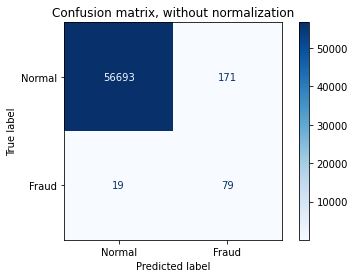

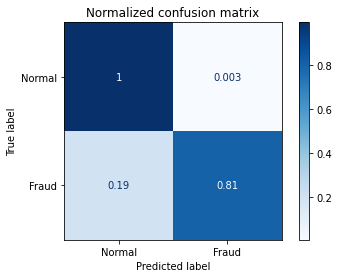

In [34]:
predicted_probs = svc.predict(X_test_scaled)
pred_f1_score = f1_score(Y_test, predicted_probs)
print(f"F1 score: {pred_f1_score}")

titles_options = [("Confusion matrix, without normalization", None),
              ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(svc, X_test_scaled, Y_test,
                                 display_labels=["Normal", "Fraud"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

In [35]:
pipeline = Pipeline([("Scaler", col_trans), ("Classifier", svc)])

In [36]:
from joblib import dump, load

dump(pipeline, "svc.joblib")


['svc.joblib']

In [37]:
X = data.loc[:,"Time":"Amount"]
Y = data["Class"]
test_input = X.loc[10:10]
print(test_input.to_dict(orient="records")[0])
class_pred = pipeline.predict(test_input)
print(class_pred)

{'Time': 10.0, 'V1': 1.44904378114715, 'V2': -1.17633882535966, 'V3': 0.913859832832795, 'V4': -1.37566665499943, 'V5': -1.97138316545323, 'V6': -0.62915213889734, 'V7': -1.4232356010359, 'V8': 0.0484558879088564, 'V9': -1.72040839292037, 'V10': 1.62665905834133, 'V11': 1.1996439495421, 'V12': -0.671439778462005, 'V13': -0.513947152539479, 'V14': -0.0950450453999549, 'V15': 0.230930409124119, 'V16': 0.0319674667862076, 'V17': 0.253414715863197, 'V18': 0.854343814324194, 'V19': -0.221365413645481, 'V20': -0.387226474431156, 'V21': -0.0093018965249005, 'V22': 0.313894410791098, 'V23': 0.0277401580170247, 'V24': 0.500512287104917, 'V25': 0.25136735874921, 'V26': -0.129477953726618, 'V27': 0.0428498709381461, 'V28': 0.0162532619375515, 'Amount': 7.8}
[0]


In [41]:
indices_fraud = list(Y[Y == True].index)
print(indices_fraud)

[541, 623, 4920, 6108, 6329, 6331, 6334, 6336, 6338, 6427, 6446, 6472, 6529, 6609, 6641, 6717, 6719, 6734, 6774, 6820, 6870, 6882, 6899, 6903, 6971, 8296, 8312, 8335, 8615, 8617, 8842, 8845, 8972, 9035, 9179, 9252, 9487, 9509, 10204, 10484, 10497, 10498, 10568, 10630, 10690, 10801, 10891, 10897, 11343, 11710, 11841, 11880, 12070, 12108, 12261, 12369, 14104, 14170, 14197, 14211, 14338, 15166, 15204, 15225, 15451, 15476, 15506, 15539, 15566, 15736, 15751, 15781, 15810, 16415, 16780, 16863, 17317, 17366, 17407, 17453, 17480, 18466, 18472, 18773, 18809, 20198, 23308, 23422, 26802, 27362, 27627, 27738, 27749, 29687, 30100, 30314, 30384, 30398, 30442, 30473, 30496, 31002, 33276, 39183, 40085, 40525, 41395, 41569, 41943, 42007, 42009, 42473, 42528, 42549, 42590, 42609, 42635, 42674, 42696, 42700, 42741, 42756, 42769, 42784, 42856, 42887, 42936, 42945, 42958, 43061, 43160, 43204, 43428, 43624, 43681, 43773, 44001, 44091, 44223, 44270, 44556, 45203, 45732, 46909, 46918, 46998, 47802, 48094, 502

In [42]:
print(X.loc[623])
print(Y[623])

Time      472.000000
V1         -3.043541
V2         -3.157307
V3          1.088463
V4          2.288644
V5          1.359805
V6         -1.064823
V7          0.325574
V8         -0.067794
V9         -0.270953
V10        -0.838587
V11        -0.414575
V12        -0.503141
V13         0.676502
V14        -1.692029
V15         2.000635
V16         0.666780
V17         0.599717
V18         1.725321
V19         0.283345
V20         2.102339
V21         0.661696
V22         0.435477
V23         1.375966
V24        -0.293803
V25         0.279798
V26        -0.145362
V27        -0.252773
V28         0.035764
Amount    529.000000
Name: 623, dtype: float64
1


# Now let's try a Gaussian Mixture Model